In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns

In [2]:
data = pd.read_csv("C:/Users/inesm/OneDrive/Bureau/gomycode/kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
data.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [4]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

### the type of bathrooms and floors should be int however it is float

In [7]:
data['bathrooms'] = data.bathrooms.apply(lambda x: round(x))
data['floors'] = data.bathrooms.apply(lambda x: round(x))

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  int64  
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  int64  
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

### waterfront, view,and yr_renovated seem to have multiple 0 values

In [9]:
data["waterfront"].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

In [10]:
data["view"].value_counts()

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

In [11]:
data["yr_renovated"].value_counts()

0       20699
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

### more than 80% of waterfront, yr_renovated and view has 0 as a value that's why we'll drop them.

In [12]:
data['sale_Year'] = data.date.apply(lambda x: x[0:4])
data.drop(["date","id","waterfront","view","yr_renovated"],axis=1, inplace=True)

In [13]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,sale_Year
0,221900.0,3,1,1180,5650,1,3,7,1180,0,1955,98178,47.5112,-122.257,1340,5650,2014
1,538000.0,3,2,2570,7242,2,3,7,2170,400,1951,98125,47.7210,-122.319,1690,7639,2014
2,180000.0,2,1,770,10000,1,3,6,770,0,1933,98028,47.7379,-122.233,2720,8062,2015
3,604000.0,4,3,1960,5000,3,5,7,1050,910,1965,98136,47.5208,-122.393,1360,5000,2014
4,510000.0,3,2,1680,8080,2,3,8,1680,0,1987,98074,47.6168,-122.045,1800,7503,2015


In [14]:
data['sale_Year'] = data['sale_Year'].astype(int)

In [15]:
import seaborn as sns  

C:\Users\inesm\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


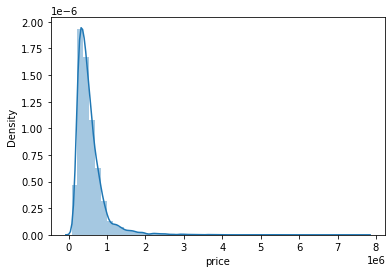

In [16]:
sns.distplot(data['price'])
plt.show()

<AxesSubplot:>

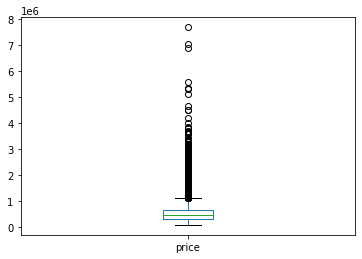

In [17]:
data["price"].plot.box()

<AxesSubplot:xlabel='sale_Year', ylabel='price'>

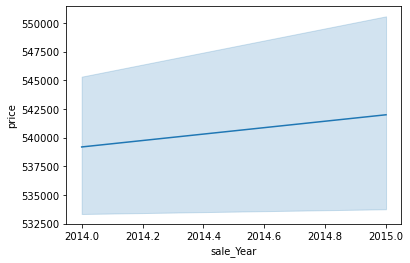

In [18]:
sns.lineplot(x='sale_Year',y='price',data=data)

### the price is a little bit increasing by the year

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

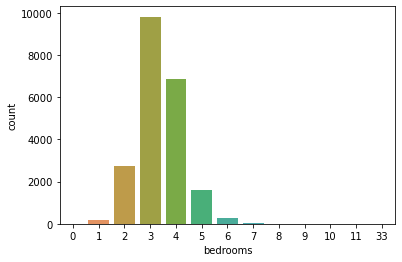

In [19]:
sns.countplot(x='bedrooms',data=data)

<AxesSubplot:xlabel='bathrooms', ylabel='count'>

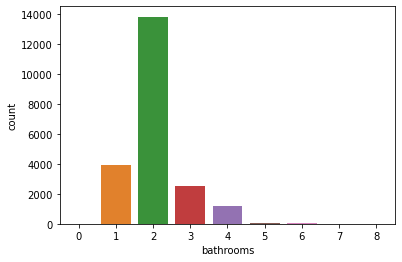

In [20]:
sns.countplot(x='bathrooms',data=data)

<AxesSubplot:xlabel='floors', ylabel='count'>

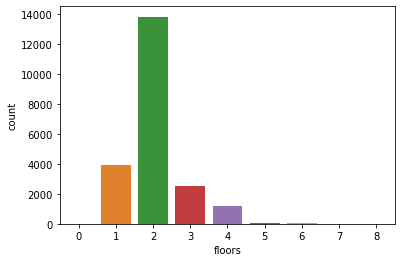

In [21]:
sns.countplot(x='floors',data=data)

###  most houses has 3-4 bedrooms, 2 bathrooms and 2 floors

<AxesSubplot:xlabel='condition', ylabel='count'>

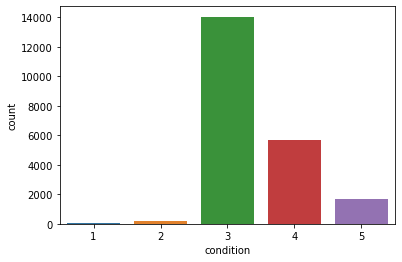

In [22]:
sns.countplot(x='condition',data=data)

<AxesSubplot:xlabel='grade', ylabel='count'>

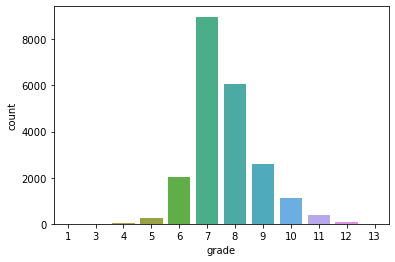

In [23]:
sns.countplot(x='grade',data=data)

###  most houses has 7-8 as a grade and 3-4 as condition rating

In [24]:

def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 22 , 22 ) )

    cmap = sns.diverging_palette( 255 , 10 , as_cmap = True )

    s =sns.heatmap(corr, cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = {'fontsize': 14 }

 )

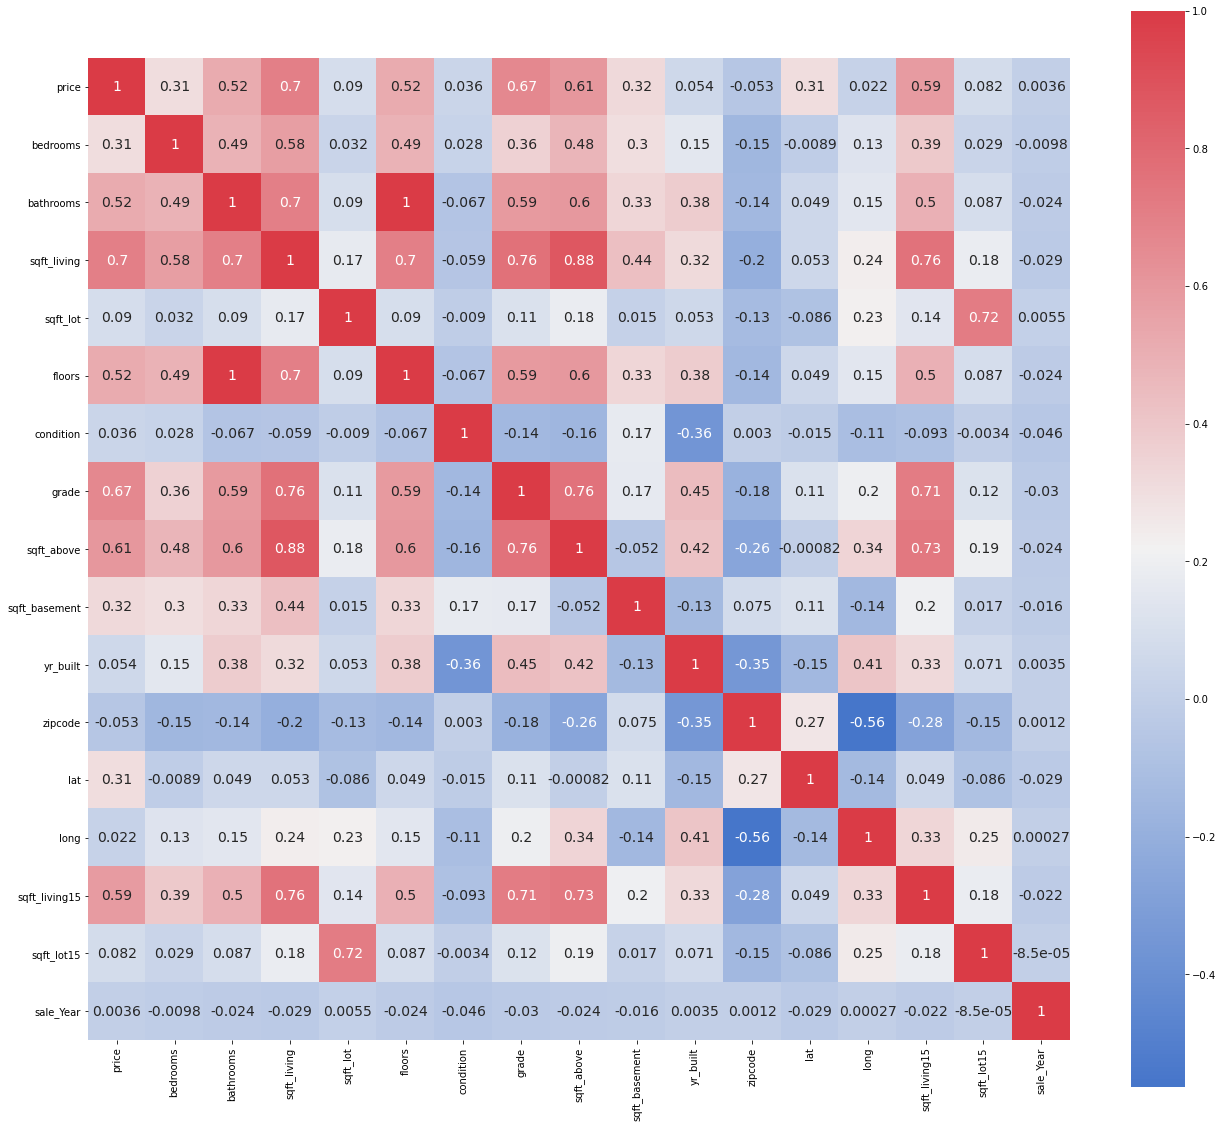

In [25]:
plot_correlation_map(data)

### it is clear that sqft_living, grade, sqft_above and floors has the highest correlation, when other features like sqft_lot, condition and long has almost 0 as correlation with price

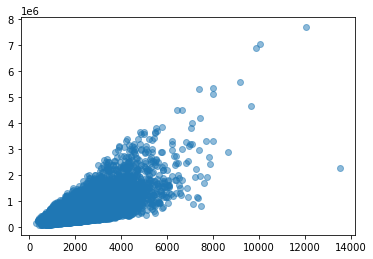

In [26]:
plt.scatter(data["sqft_living"], data["price"], alpha=0.5)
plt.show()

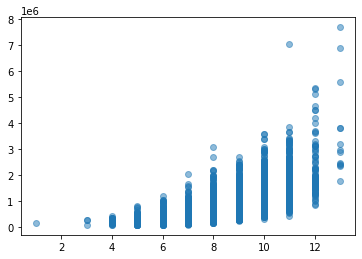

In [27]:
plt.scatter(data["grade"], data["price"], alpha=0.5)
plt.show()

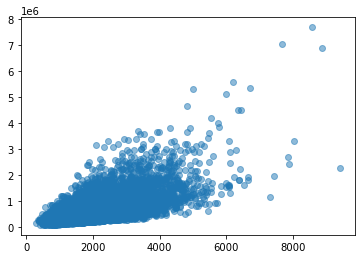

In [28]:
plt.scatter(data["sqft_above"], data["price"], alpha=0.5)
plt.show()

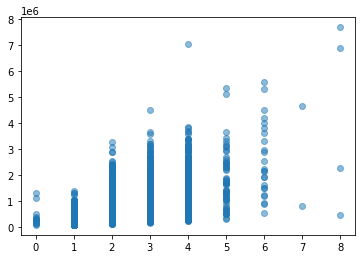

In [29]:
plt.scatter(data["floors"], data["price"], alpha=0.5)
plt.show()

### since sqf_living has the highest correlation with price we will use it for linear regression with one input

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

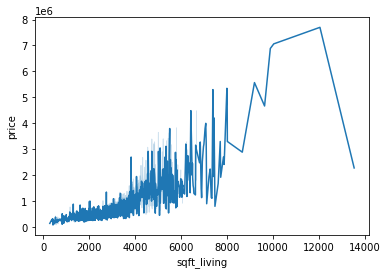

In [30]:
sns.lineplot(x='sqft_living',y='price',data=data)

<AxesSubplot:>

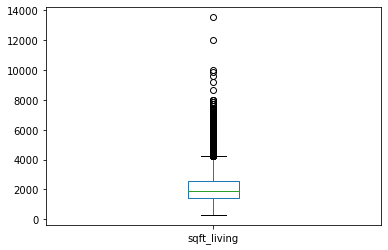

In [31]:
data["sqft_living"].plot.box()

In [32]:
new_data=data[data["sqft_living"]<10000]

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

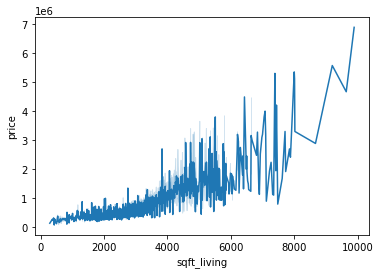

In [33]:
sns.lineplot(x='sqft_living',y='price',data=new_data)

<AxesSubplot:>

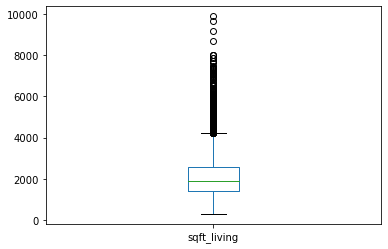

In [34]:
new_data["sqft_living"].plot.box()

# Linear regression

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [36]:
x=new_data["sqft_living"].values[:,np.newaxis]
y=new_data["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) 

model=LinearRegression()
model.fit(x_train,y_train)  
predicted=model.predict(x_test)

In [37]:
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 62372480583.82409
R squared 0.5011356518634542


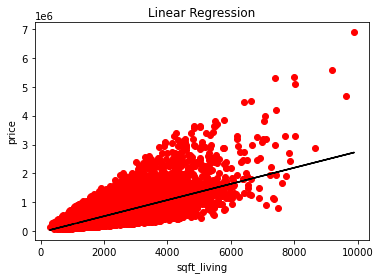

In [38]:
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("sqft_living")
plt.plot(x,model.predict(x),color="k")
plt.show()

In [39]:
#Multi linear regression
x1=new_data.drop(["price"],axis=1)  
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.35,random_state=40) 

model=LinearRegression() 
model.fit(x_train,y_train)
predicted=model.predict(x_test)

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 40786552051.14962
R squared 0.6737831089724062


In [40]:
#polynomial regression
from sklearn.preprocessing import PolynomialFeatures 
x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=0.35, random_state=40)  
lg=LinearRegression()
poly=PolynomialFeatures(degree=2)

x_train_fit = poly.fit_transform(x_train)
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  28802253081.8546
R squared:  0.7696353091291103


### polynomial regression gives better R-quared/MSE value than multi linear regression and much better than simple linear regression